In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import h5py
import base64
import requests
from pathlib import Path
import os
from tensorflow.keras.models import load_model, Model,Sequential
from tensorflow.keras.utils import plot_model

# Download:
Here, we download the file from a github repository.

In [2]:
# download content
directory = Path("modules")
filename = "alien.h5"
file_path = directory / filename
raw = "https://github.com/Q-b1t/htbml/raw/main/MYSTERIOUS_LEARNING/alien.h5"

if not os.path.exists(directory):
  os.makedirs(directory)

if file_path.exists():
  print(f"File {filename} has already beed downloaded.\nSkipping...")
else:
  print(f"Downloading {filename}...")
  request = requests.get(raw)
  with open(file_path,"wb") as f:
    f.write(request.content)

File alien.h5 has already beed downloaded.
Skipping...


It was quite clear from the start this was a tensorflow model. However, i searched for possible hidden metadata that would've proved useful.

In [3]:
with h5py.File(file_path,"r") as hdf:
  ls= list(hdf.keys())
  print("Datasets:",ls)
  model_weights = hdf.get('model_weights')
  optimizer_weights = hdf.get("optimizer_weights")
  print(hdf.name)

Datasets: ['model_weights', 'optimizer_weights']
/


In [4]:
model_weights

<Closed HDF5 group>

In [5]:
optimizer_ds = np.array(optimizer_weights)
model_ds = np.array(model_weights)

In [6]:
# whatttt the hell??'
optimizer_ds.shape,model_ds.shape

((), ())

In [7]:
hdf.close()

We load the model, see the summary and visualize it in different ways. In a nutshell, we are searching for useful stuff.



In [8]:
model = load_model(file_path,compile=True)

SFRCe24wdF9zb


In [9]:
model.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.0>}

In [10]:
model_json_string = model.to_json()
model_json_string

'{"class_name": "Sequential", "config": {"name": "19oNHJkX3RvX3V", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 32, 32, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_3_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_3", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 32, 32, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_2", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": 

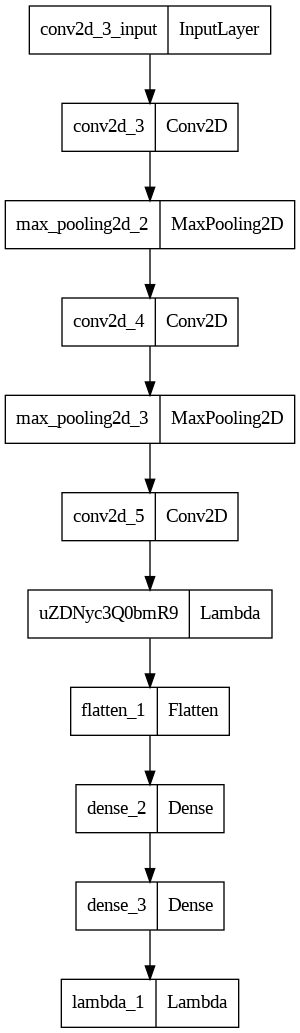

In [11]:
plot_model(model)

In [12]:
model.summary(expand_nested=True,show_trainable=True)

Model: "19oNHJkX3RvX3V"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       Y          
                                                                            
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         Y          
 2D)                                                                        
                                                                            
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     Y          
                                                                            
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         Y          
 2D)                                                                        
                                                                            
 conv2d_5 (Conv2D)           (None, 4, 4, 64)       

What proved most useful is the lines at the model's name, the string that's displayed when loading the weights and compiling, and the fifth layer's name. They look like a 64 base encoding.

In [13]:
model_name = model.name
layer_mysterious = model.layers[5].name
stuff = "SFRCe24wdF9zb"
stuff,model_name,layer_mysterious

('SFRCe24wdF9zb', '19oNHJkX3RvX3V', 'uZDNyc3Q0bmR9')

In [14]:
cipher = stuff + model_name + layer_mysterious
cipher

'SFRCe24wdF9zb19oNHJkX3RvX3VuZDNyc3Q0bmR9'

In [15]:
decoded_str = base64.b64decode(cipher).decode('utf-8')
decoded_str

'HTB{n0t_so_h4rd_to_und3rst4nd}'